In [56]:
import torch
from torch import nn
from torch import Tensor
import requests
import os
from pathlib import Path
from typing import Callable
from functools import partial
import matplotlib.pyplot as plt

URL = 'https://download.pytorch.org/models/resnet18-5c106cde.pth'

In [45]:
from glasses.utils.PretrainedWeightsProvider import PretrainedWeightsProvider
from torch.nn.functional import adaptive_avg_pool2d

provider = PretrainedWeightsProvider()

model = provider['resnet18']

tensor([[0.0476, 0.0000],
        [0.0138, 0.0000],
        [0.0009, 0.0000]])
tensor([0.0476, 0.0138, 0.0009])


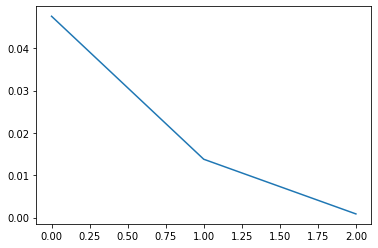

In [68]:
with torch.no_grad():
    x = model.encoder.blocks[-1].block[0].block.block.conv1.weight[0]

    ev, _ = torch.eig(x[0], eigenvectors=True)
    
    ev_real = ev[:,0]
    figure = plt.figure()

    plt.plot(ev_real.numpy())
    
    print(ev_real)

In [34]:
??avg_pool2d

In [2]:
%load_ext autoreload

%autoreload 2

In [4]:
from glasses.nn.models.classification.resnet import ResNet, ResNetBottleneckBlock, ResNetEncoder, ResNetBasicBlock
from glasses.nn.models.classification.densenet import DenseNet, DenseNetEncoder, TransitionBlock
from glasses.nn.models.classification.mobilenet import MobileNetEncoder
from glasses.nn.models.segmentation.unet import UNet, UNetEncoder
from functools import partial
from torchsummary import summary

x = torch.rand((1,1,224,224))

unet = UNet(1, n_classes=2)
unet(x)

tensor([[[[ 0.0772,  0.2468,  0.0378,  ..., -0.0923, -0.1824,  0.1713],
          [ 0.3918,  0.2547,  0.3007,  ...,  0.0977,  0.0139, -0.2737],
          [ 0.5582,  0.0309,  0.1796,  ...,  0.1827, -0.1732, -0.2105],
          ...,
          [ 0.0686,  0.4146,  0.1586,  ..., -0.2502,  0.1623, -0.3160],
          [-0.3456,  0.1369, -0.1815,  ...,  0.5352, -0.1767, -0.1576],
          [ 0.2580,  0.4078,  0.2556,  ...,  0.3599,  0.1640,  0.2413]],

         [[ 0.0381,  0.2632, -0.0644,  ..., -0.3150,  0.2631,  0.2014],
          [-0.0441, -0.1492,  0.4175,  ...,  0.4077,  0.6664,  0.5212],
          [ 0.1247,  0.0249, -0.4995,  ..., -0.8009, -0.4319, -0.3534],
          ...,
          [-0.6494,  0.2061,  0.4023,  ...,  0.5828,  0.0681, -0.5076],
          [ 0.1859, -0.0686, -0.4607,  ...,  0.1644,  0.2183, -0.5342],
          [-0.2189, -0.0205,  0.1018,  ...,  0.0332,  0.0322,  0.2061]]]],
       grad_fn=<MkldnnConvolutionBackward>)

In [10]:
from functools import partial
x = torch.rand((1,1,224,224))
unet = UNet(encoder=MobileNetEncoder)
unet(x)

# summary(unet, (1,224,224))

torch.Size([1, 1280, 7, 7]) torch.Size([1, 320, 7, 7])
res torch.Size([1, 320, 13, 13]) pad, (3, 3, 3, 3)
up torch.Size([1, 320, 14, 14])


RuntimeError: Sizes of tensors must match except in dimension 1. Got 13 and 14 in dimension 2 (The offending index is 1)

In [17]:
from glasses.nn.models.classification import MobileNetV2

model =MobileNetV2()
features = []
x = torch.rand((1,3,224,224))

x = model.encoder.gate(x)
for block in model.encoder.blocks:
    x = block(x)
    features.append(x)
print([x.shape for x in features])

[torch.Size([1, 16, 112, 112]), torch.Size([1, 24, 56, 56]), torch.Size([1, 32, 28, 28]), torch.Size([1, 64, 14, 14]), torch.Size([1, 96, 14, 14]), torch.Size([1, 160, 7, 7]), torch.Size([1, 320, 7, 7]), torch.Size([1, 1280, 7, 7])]


In [150]:
from functools import partial
x = torch.rand((1,1,224,224))
unet = UNet(encoder=DenseNetEncoder)
unet(x)
# print(unet.encoder.widths)
# unet.decoder.in_out_block_sizes
# summary(unet.encoder, (1,224,224))

torch.Size([1, 248, 7, 7]) torch.Size([1, 120, 7, 7])
up torch.Size([1, 120, 14, 14])


RuntimeError: Sizes of tensors must match except in dimension 1. Got 7 and 14 in dimension 2

In [143]:
unet.decoder

UNetDecoder(
  (blocks): ModuleList(
    (0): UpLayer(
      (up): ConvTranspose2d(248, 120, kernel_size=(2, 2), stride=(2, 2))
      (block): UNetBasicBlock(
        (block): Sequential(
          (0): Sequential(
            (0): ConvBnAct(
              (conv): Conv2dPad(240, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (bn): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (act): ReLU(inplace=True)
            )
            (1): ConvBnAct(
              (conv): Conv2dPad(120, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (bn): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (act): ReLU(inplace=True)
            )
          )
        )
      )
    )
    (1): UpLayer(
      (up): ConvTranspose2d(120, 112, kernel_size=(2, 2), stride=(2, 2))
      (block): UNetBasicBlock(
        (block): Sequential(
          (0): Sequential(
            (0): Co

In [144]:
model = DenseNetEncoder()
x = torch.rand((1,3,224,224))
x = model.gate(x)
for block in model.blocks:
    x = block(x)
    print(x.shape)

torch.Size([1, 96, 28, 28])
torch.Size([1, 112, 14, 14])
torch.Size([1, 120, 7, 7])
torch.Size([1, 248, 7, 7])


In [141]:
model

DenseNetEncoder(
  (gate): Sequential(
    (conv): Conv2dPad(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU(inplace=True)
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (blocks): ModuleList(
    (0): DenseNetLayer(
      (block): Sequential(
        (0): DenseBottleNeckBlock(
          (block): Residual(
            (block): Sequential(
              (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (act1): ReLU(inplace=True)
              (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (act2): ReLU(inplace=True)
              (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            )

In [71]:
from __future__ import annotations
import torch
import torch.nn.functional as F
from torch import nn
from torch import Tensor
from collections import OrderedDict
from typing import List
from functools import partial
from glasses.nn.blocks import ConvBnAct, Conv2dPad
from glasses.nn.models.segmentation.unet import UNet


In [80]:
from glasses.nn.models.classification.efficientnet import EfficientNet
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_dst  = EfficientNet.b5()

info = summary(model_dst.to(device), (3,224,224))

# model_dst

info[0].item()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Conv2dPad-1         [-1, 48, 112, 112]           1,296
       BatchNorm2d-2         [-1, 48, 112, 112]              96
             Swish-3         [-1, 48, 112, 112]               0
   DepthWiseConv2d-4         [-1, 48, 112, 112]             432
       BatchNorm2d-5         [-1, 48, 112, 112]              96
             Swish-6         [-1, 48, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 48, 1, 1]               0
            Conv2d-8             [-1, 12, 1, 1]             588
             Swish-9             [-1, 12, 1, 1]               0
           Conv2d-10             [-1, 48, 1, 1]             624
          Sigmoid-11             [-1, 48, 1, 1]               0
        ChannelSE-12         [-1, 48, 112, 112]               0
        Conv2dPad-13         [-1, 24, 112, 112]           1,152
      BatchNorm2d-14         [-1, 24, 1

30389784

## Model Provider

In [29]:
from glasses.utils.PretrainedWeightsProvider import PretrainedWeightsProvider

provider = PretrainedWeightsProvider()

provider['mobilenet_v2']

MobileNetV2(
  (encoder): MobileNetEncoder(
    (gate): Sequential(
      (0): ConvBnAct(
        (conv): Conv2dPad(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): ReLU6()
      )
    )
    (blocks): ModuleList(
      (0): MobileNetLayer(
        (block): Sequential(
          (0): InvertedResidualBlock(
            (block): Residual(
              (block): Sequential(
                (depth): ConvBnAct(
                  (conv): DepthWiseConv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
                  (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (act): ReLU6()
                )
                (point): Sequential(
                  (conv): Conv2dPad(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (bn): BatchNorm2d(16, eps=1e-05, mom

In [ ]:
model_dst

In [ ]:
y_dst

tensor([[-9.3545e-01,  4.4536e-01,  4.2809e-02, -7.1374e-01,  3.6706e-01,
          2.3940e-01, -1.3259e+00, -3.2074e-01, -1.6859e+00, -7.2495e-01,
         -1.2006e+00, -5.1331e-01, -7.6875e-01, -1.4668e+00, -8.2695e-01,
         -4.0084e-02,  3.0943e-01, -7.2798e-01, -4.7880e-01, -8.8295e-01,
         -1.6215e+00,  7.9493e-01,  3.6127e-02, -5.1066e-01, -4.0636e-01,
         -8.5400e-01, -1.2117e+00, -2.1563e-01, -1.1900e+00, -5.3588e-01,
         -9.6766e-01, -8.8796e-01, -1.2135e+00, -6.0439e-01, -7.0122e-01,
         -1.4644e+00, -1.1432e+00, -9.4588e-01, -9.1610e-01, -1.1081e+00,
         -7.2389e-01, -8.2417e-01, -8.6236e-01, -1.3655e+00, -1.6005e+00,
         -1.3012e-01, -1.6388e+00, -7.9500e-01, -1.2640e+00, -1.1749e+00,
         -1.2268e+00, -4.6094e-01, -7.8901e-01, -1.4785e+00, -2.4503e+00,
         -5.8356e-01, -1.4344e+00, -6.2406e-01, -1.2202e+00, -3.8103e-01,
         -1.2667e+00, -7.2553e-01, -1.5403e+00, -2.9658e-01, -7.7501e-01,
         -4.5203e-01, -1.2975e+00, -1.

In [ ]:
model_src